<a href="https://colab.research.google.com/github/Polindem/IDAL_IA3/blob/main/5.%20Deep_Learning_dnn_mnist_solved%20(Optim.%20L2%2C%20Dropout).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento de un Perceptrón Multi-Capa con datos de dígitos (MNIST)

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt
tf.random.set_seed(42)

## Carga de los datos
#### Tamaño del conjunto de entrenamiento y de test

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(' -Entradas Entrenamiento:', X_train.shape) # 60 000 images, 28x28 pixeles
print(' -Salidas Entrenamiento:', y_train.shape) # 10 posibles clases entre 0 y 9 
print(' -Entradas Test:', X_test.shape)
print(' -Salidas Test:', y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
 -Entradas Entrenamiento: (60000, 28, 28)
 -Salidas Entrenamiento: (60000,)
 -Entradas Test: (10000, 28, 28)
 -Salidas Test: (10000,)


#### Visualización de las entradas

Valores de salida correspondientes a las imágenes de entrada [5 0 4]


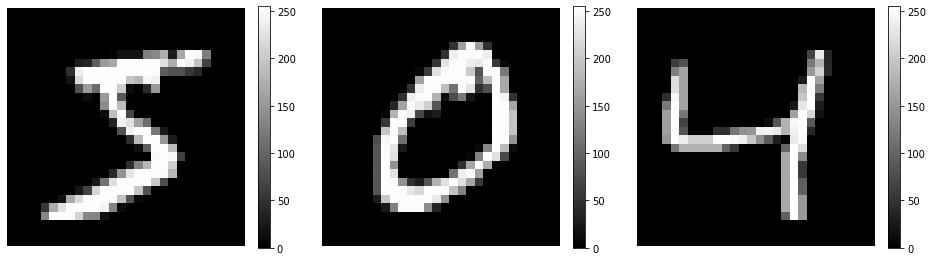

In [6]:
n_img_show = 3

# Plot images
plt.figure(figsize=(16,10))
for i in range(n_img_show):
    plt.subplot(1, n_img_show, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.colorbar(fraction=0.046)
    plt.axis('off');

print(f'Valores de salida correspondientes a las imágenes de entrada {y_train[0:n_img_show]}')

## Preparación de los datos
#### Normalización

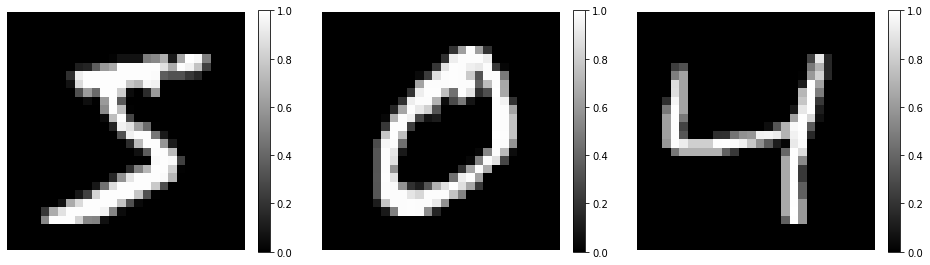

In [7]:
# Normalizamos a valores entre 0 y 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

plt.figure(figsize=(16,10))
for i in range(n_img_show):
    plt.subplot(1, n_img_show, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.colorbar(fraction=0.046)
    plt.axis('off');

#### Reajuste del tamaño de la entrada y la salida

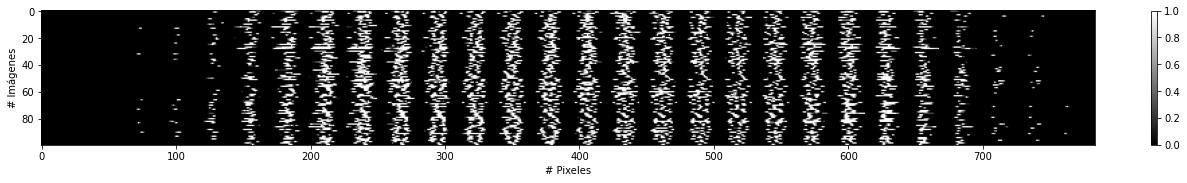

In [8]:
x_shape = X_train.shape
X_train = X_train.reshape(x_shape[0], x_shape[1]*x_shape[2])
X_test = X_test.reshape(len(X_test), x_shape[1]*x_shape[2])
y_train = y_train[:, None]
y_test = y_test[:, None]

# Dibujar la nueva entrada
plt.figure(figsize=(20, 70))
plt.imshow(X_train[0:100], cmap='gray')
plt.xlabel('# Pixeles')
plt.ylabel('# Imágenes')
plt.colorbar(fraction=0.006);

## Definición del modelo
Crea un modelo con las siguientes capas:
1. Capa de entrada con tantas entradas como número de píxeles (728) 
2. Capa oculta con 256 neuronas
3. Capa oculta con 128 neuronas
4. Capa oculta con 64 neuronas
5. Capa oculta con 32 neuronas
6. Capa de salidad con tantas neuronas como salidas (10)

Todas las capas usan función de activación relu (menos la de salida). ¿Qué función de activación hay que poner a la salida?


In [9]:
# Algunos hiper-parámetros
lr = .001
batch_size = 512
n_epochs = 35
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Crear modelo
model = tf.keras.models.Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)))# model.add(), tengo que añadir una nueva capa
# shape 0 sería el número de imagenes que tenemos. Shape 1 es lo mismo que poner 784.. 
#si dejo abierto el segundo param que es el núm. de imágenes x_train.shape[], ), keras lo detecta como none = o está definido el tamaño del batch
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Visualizar arquitectura y dimensiones
model.summary()

# Compilamos el modelo: ¿Qué función de coste hay que utilizar?
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento del modelo

In [10]:
hist = model.fit(X_train, 
                 y_train, 
                 batch_size=batch_size, 
                 epochs=n_epochs, 
                 verbose=1, 
                 shuffle=True,
                 validation_data=(X_test, y_test))

Epoch 1/35
118/118 [==============================] - 3s 6ms/step - loss: 0.9732 - accuracy: 0.6789 - val_loss: 0.2115 - val_accuracy: 0.9373
Epoch 2/35
118/118 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9507 - val_loss: 0.1410 - val_accuracy: 0.9589
Epoch 3/35
118/118 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9646 - val_loss: 0.1012 - val_accuracy: 0.9702
Epoch 4/35
118/118 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9750 - val_loss: 0.0996 - val_accuracy: 0.9687
Epoch 5/35
118/118 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9788 - val_loss: 0.0868 - val_accuracy: 0.9731
Epoch 6/35
118/118 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9854 - val_loss: 0.0800 - val_accuracy: 0.9750
Epoch 7/35
118/118 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9885 - val_loss: 0.0781 - val_accuracy: 0.9771
Epoch 

### Dibujar las curvas de entrenamiento/validación

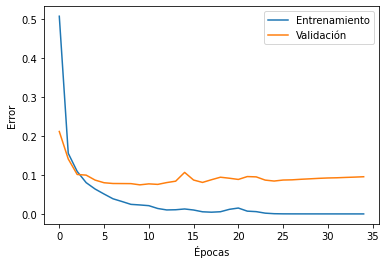

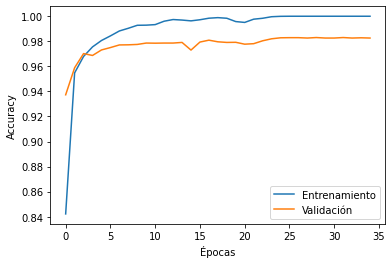

In [11]:
def plot_curves(history):
  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Entrenamiento', 'Validación'])

  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Entrenamiento', 'Validación'], loc='lower right');

plot_curves(hist.history)

### Visualización de los pesos

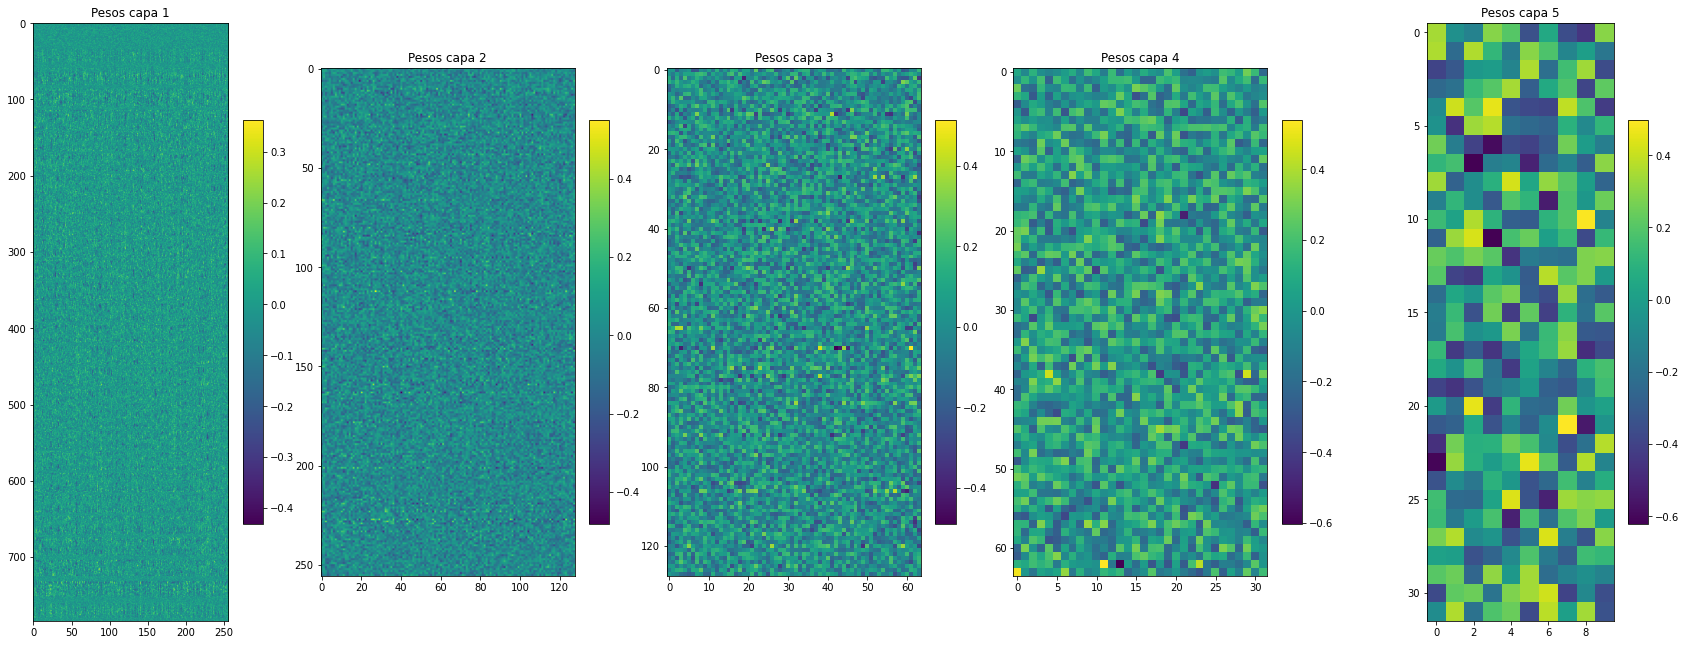

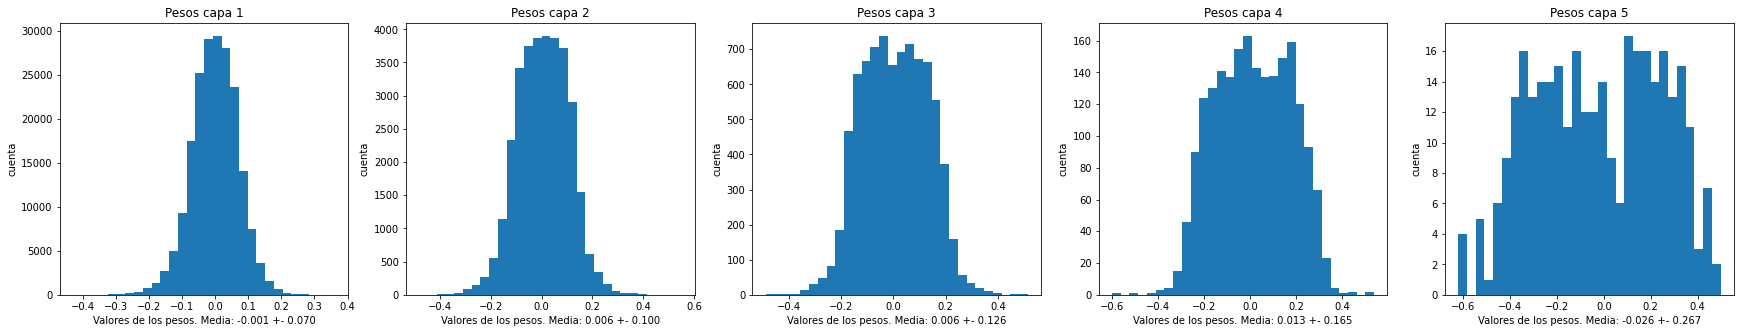

In [12]:
def plot_weights(model):
  layers = [l for l in model.layers if l.name.startswith('dense')] #Solo está guardando las capas que empiezan por ´dense´
  n_img_show = len(layers)
  plt.figure(figsize=(30, 11))
  cnt = 1
  for layer in layers:
      plt.subplot(1, n_img_show, cnt)
      plt.imshow(layer.get_weights()[0])
      plt.title(f'Pesos capa {cnt}')
      plt.colorbar(fraction=0.07)
      cnt += 1

def plot_weights_hist(model):
  layers = [l for l in model.layers if l.name.startswith('dense')]
  n_img_show = len(layers)
  plt.figure(figsize=(30, 5))
  cnt = 1
  for layer in layers:
    if layer.name.startswith('dense'):
      plt.subplot(1, n_img_show, cnt)
      plt.hist(layer.get_weights()[0].flatten(), bins=30)
      plt.title(f'Pesos capa {cnt}')
      mean = np.mean(layer.get_weights()[0]) #cojo los pesos y calculo la media y la std
      std = np.std(layer.get_weights()[0]) 
      plt.xlabel(f'Valores de los pesos. Media: {mean:.3f} +- {std:.3f}')
      plt.ylabel('cuenta')
      cnt +=1

plot_weights(model)
plot_weights_hist(model) #distribución de los pesos 

## Regularización del modelo con L2
Crea un modelo nuevo exactamente igual que el anterior y añade regularización L2 en todas las capas (menos en la de salida, como es obvio). Prueba distintos valores (0.1, 0.01 y 0.001) y observa cual es el comportamiento.



In [18]:
tf.keras.backend.clear_session()
n_epochs = 50
reg = 0.01 # el que mejor funciona

# Crear modelo
model_with_l2 = tf.keras.models.Sequential()
model_with_l2.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(reg)))
model_with_l2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)))
model_with_l2.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)))
model_with_l2.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)))
model_with_l2.add(Dense(10, activation='softmax')) #no aplicamos la regularización a la capa de salida
#tanto como no aplicaríamos el dropout porque no nos interesa cancelar los pesos a la capa de salida

# Compilamos el modelo
model_with_l2.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Entrenamos
hist = model_with_l2.fit(X_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=n_epochs,
                         verbose=1,
                         shuffle=True, 
                         validation_data=(X_test, y_test))

Epoch 1/50
118/118 [==============================] - 1s 4ms/step - loss: 2.9822 - accuracy: 0.7422 - val_loss: 0.8734 - val_accuracy: 0.9072
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 0.8402 - accuracy: 0.9113 - val_loss: 0.7569 - val_accuracy: 0.9184
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.7451 - accuracy: 0.9228 - val_loss: 0.7034 - val_accuracy: 0.9248
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.9264 - val_loss: 0.6772 - val_accuracy: 0.9253
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.9288 - val_loss: 0.6173 - val_accuracy: 0.9371
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.9372 - val_loss: 0.6361 - val_accuracy: 0.9226
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.6129 - accuracy: 0.9354 - val_loss: 0.5781 - val_accuracy: 0.9420
Epoch 

### Evaluación del modelo con regularización L2

Test Loss: 0.39043495059013367
Test Accuracy: 0.9613999724388123


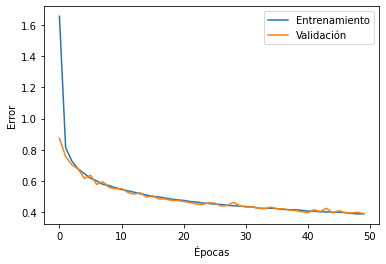

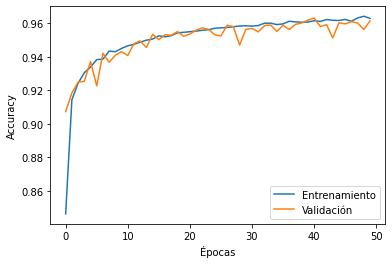

In [19]:
# Evaluación del modelo en datos de test    
loss, accuracy = model_with_l2.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
plot_curves(hist.history)

### Visualización de los pesos

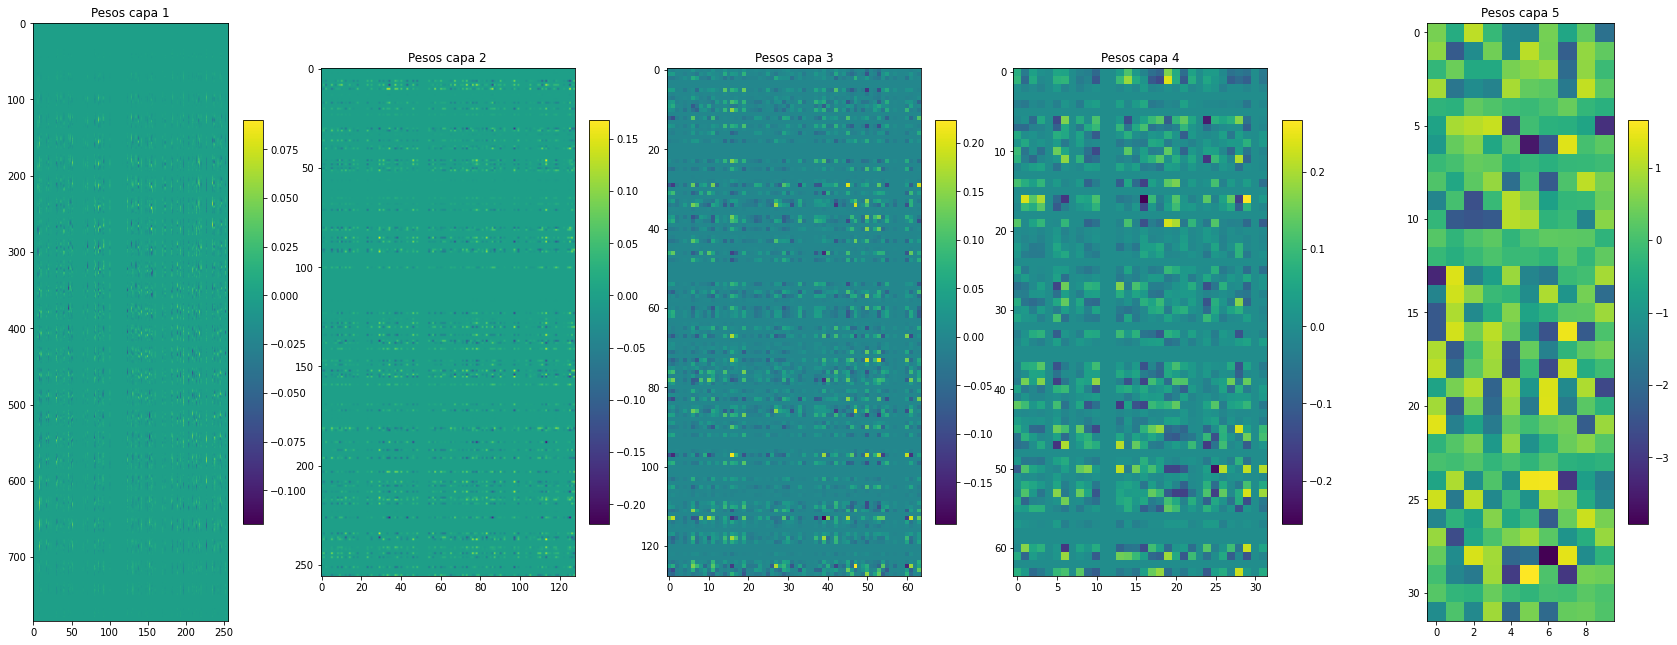

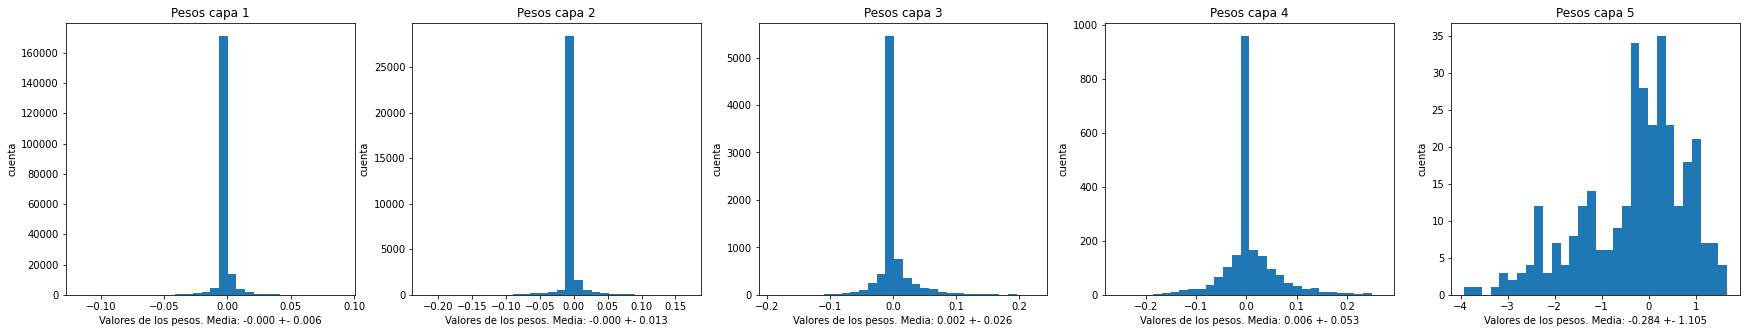

In [20]:
plot_weights(model_with_l2)
plot_weights_hist(model_with_l2) 
# pesos más cercanos a 0, lo que estabamos buscando regularizando con L2 
#(L1 cancela algunos de los pesos con las car. menos importantes directamente, L2 intenta bajar algunos y que estén más cercanos a 0)

## Regularización del modelo con Dropout
Ahora crea el mismo modelo pero añade dropout. Prueba distintos valores de dropout.

In [ ]:
tf.keras.backend.clear_session()

# Crear modelo
n_epochs = 25
model_with_dp = tf.keras.models.Sequential()

model_with_dp.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)))
model_with_dp.add(Dropout(0.4))

model_with_dp.add(Dense(128, activation='relu'))
model_with_dp.add(Dropout(0.4))

model_with_dp.add(Dense(64, activation='relu'))
model_with_dp.add(Dropout(0.4))

model_with_dp.add(Dense(32, activation='relu'))
model_with_dp.add(Dropout(0.4))

model_with_dp.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model_with_dp.compile(loss='sparse_categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])

# Entrenamos
hist = model_with_dp.fit(X_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=n_epochs,
                         verbose=1, 
                         shuffle=True, 
                         validation_data=(X_test, y_test))

Epoch 1/25
118/118 [==============================] - 2s 17ms/step - loss: 0.9021 - accuracy: 0.7034 - val_loss: 0.2501 - val_accuracy: 0.9359
Epoch 2/25
118/118 [==============================] - 2s 17ms/step - loss: 0.3904 - accuracy: 0.9036 - val_loss: 0.1821 - val_accuracy: 0.9539
Epoch 3/25
118/118 [==============================] - 2s 17ms/step - loss: 0.3045 - accuracy: 0.9262 - val_loss: 0.1630 - val_accuracy: 0.9593
Epoch 4/25
118/118 [==============================] - 2s 17ms/step - loss: 0.2676 - accuracy: 0.9362 - val_loss: 0.1482 - val_accuracy: 0.9634
Epoch 5/25
118/118 [==============================] - 2s 17ms/step - loss: 0.2345 - accuracy: 0.9438 - val_loss: 0.1411 - val_accuracy: 0.9658
Epoch 6/25
118/118 [==============================] - 2s 15ms/step - loss: 0.2164 - accuracy: 0.9486 - val_loss: 0.1329 - val_accuracy: 0.9678
Epoch 7/25
118/118 [==============================] - 2s 14ms/step - loss: 0.1995 - accuracy: 0.9528 - val_loss: 0.1272 - val_accuracy: 0.9697

### Evaluación del modelo con Dropout

Error test: 0.11642874777317047
Accuracy test: 0.9769999980926514


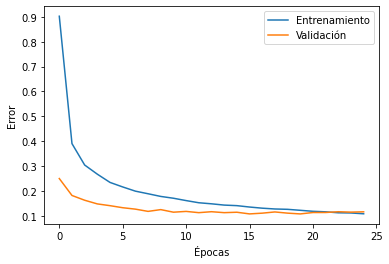

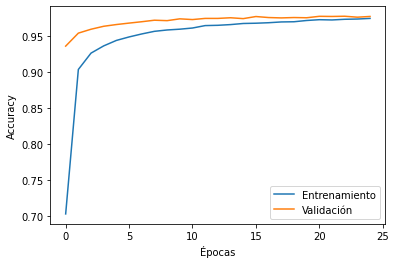

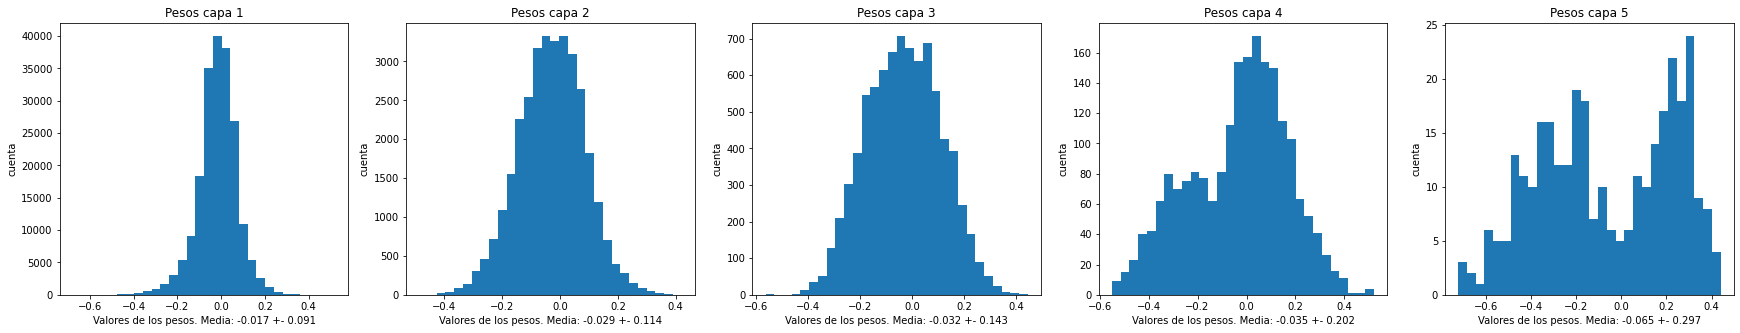

In [ ]:
# Evaluating the model on the test data    
loss, accuracy = model_with_dp.evaluate(X_test, y_test, verbose=0)
print('Error test:', loss)
print('Accuracy test:', accuracy)

# Plots
plot_curves(hist.history)
# plot_weights(model_with_dp)
plot_weights_hist(model_with_dp)